In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:

import random

# The data to load
f = "results.csv"

# Count the lines
num_lines = sum(1 for l in open(f))

# Sample size - in this case ~10%
size = int(num_lines / 10)

# The row indices to skip - make sure 0 is not included to keep the header!
skip_idx = random.sample(range(1, num_lines), num_lines - size)

# Read the data
df = pd.read_csv(f, skiprows=skip_idx )


# df = pd.read_csv('results.csv')
df.head()

,25k,age,name,division,10k,gender,half,official,bib,ctz,...,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,77.8,30,"Hunt, Jeffrey",8,30.95,M,65.58,134.47,14,NaN,...,8,5.13,NaN,94.02,15.9,8,62.2,110.47,Randwick,126.95
1,67.72,30,"Finney, Adam",32,24.87,M,56.03,122.88,W30,NaN,...,41,4.70,IL,84.1,11.9,34,53.23,101.45,Champaign,115.28
2,81.98,27,"Cassidy, Michael T.",32,32.37,M,69.13,144.38,30,NaN,...,39,5.52,NY,98.85,16.17,39,65.57,116.38,New York,135.22
3,75.77,32,"Ordaz-Cruz, Marcelo",37,28.13,M,63.42,139.88,W41,MEX,...,46,5.33,MN,95.33,13.22,39,60.48,116.67,Minneapolis,131.42
4,75.78,19,"Roy, Laurence D. III",35,28.15,M,63.4,135.23,W42,NaN,...,44,5.17,IL,93.12,13.42,37,60.2,112.1,Champaign,127.72


In [11]:
df.shape

(1615, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 21 columns):
25k          1615 non-null object
age          1615 non-null int64
name         1615 non-null object
division     1615 non-null int64
10k          1615 non-null object
gender       1615 non-null object
half         1615 non-null object
official     1615 non-null float64
bib          1615 non-null object
ctz          70 non-null object
country      1615 non-null object
overall      1615 non-null int64
pace         1615 non-null float64
state        1451 non-null object
30k          1615 non-null object
5k           1615 non-null object
genderdiv    1615 non-null int64
20k          1615 non-null object
35k          1615 non-null object
city         1615 non-null object
40k          1615 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 265.0+ KB


In [12]:
df.isnull().sum()


25k             0
age             0
name            0
division        0
10k             0
gender          0
half            0
official        0
bib             0
ctz          1545
country         0
overall         0
pace            0
state         164
30k             0
5k              0
genderdiv       0
20k             0
35k             0
city            0
40k             0
dtype: int64

In [13]:
# Reorder columns to group varibles by type [continous, catagorical(ordinal), catagorical(binary)]
list(df.columns.values)


['25k',
 'age',
 'name',
 'division',
 '10k',
 'gender',
 'half',
 'official',
 'bib',
 'ctz',
 'country',
 'overall',
 'pace',
 'state',
 '30k',
 '5k',
 'genderdiv',
 '20k',
 '35k',
 'city',
 '40k']

In [ ]:
# Reorder columns to group varibles by type [continous, catagorical(ordinal), catagorical(binary)]
cols = list(df.columns.values)
new_index = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'cp',  'restecg', 'slope', 'ca', 'thal', 'exang', 'fbs', 'sex', 'target']
df = df.reindex(columns=new_index)
df.head(3)

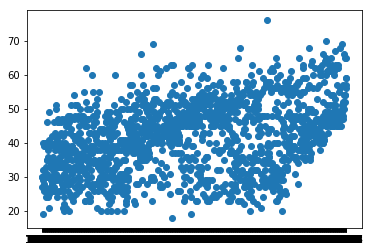

In [6]:
# Look at our data.
plt.scatter(df['40k'],df['age'])


plt.show()

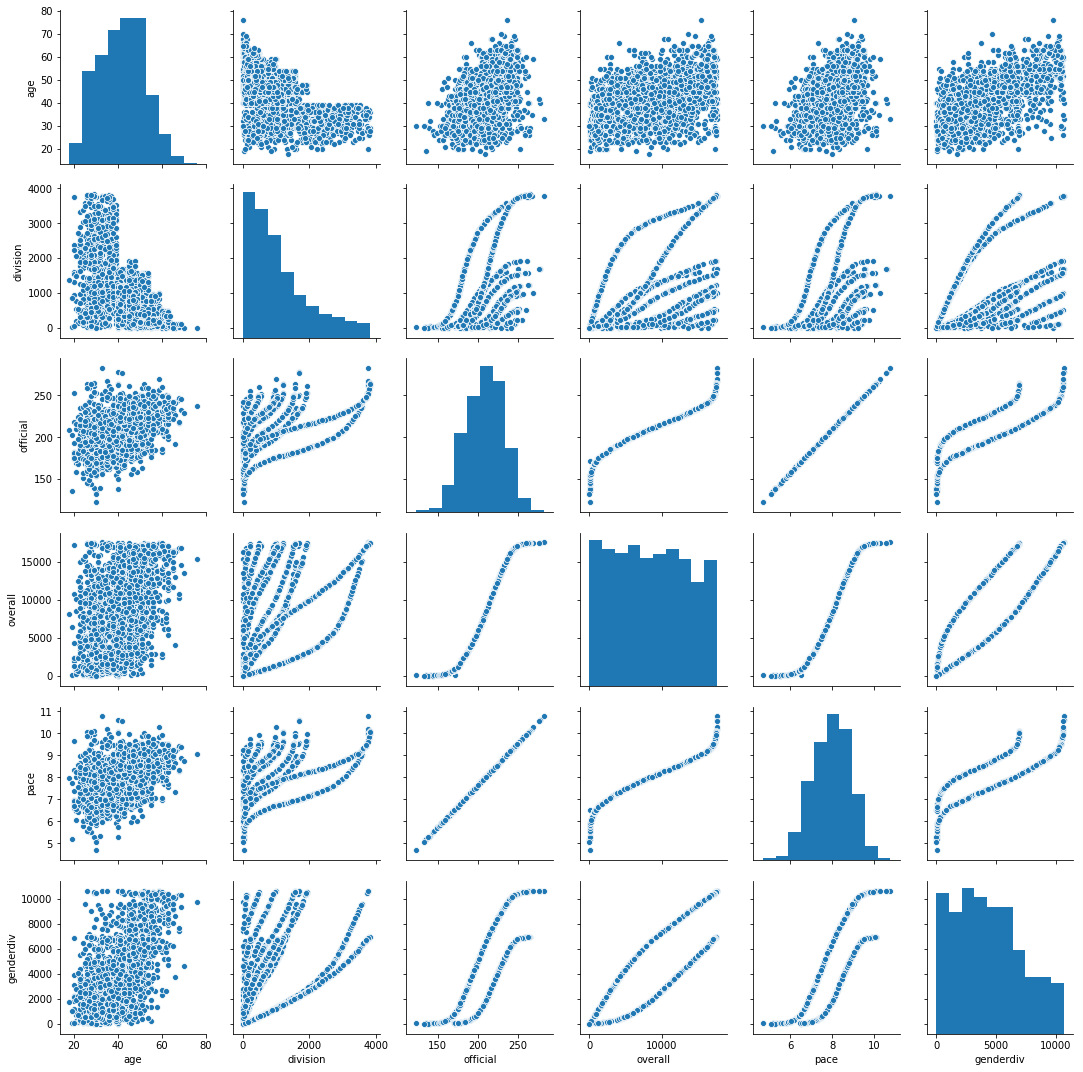

In [9]:
sns.pairplot(df)

In [2]:

#df = pd.read_csv(results.csv)

# Make sure the number of rows divides evenly into four samples.
rows = df.shape[0] - df.shape[0] % 4
df = df.iloc[:rows, :]

# Break into a set of features and a variable for the known outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace some random string values.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

# Normalize
X_norm = normalize(X)

# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Create the two-feature PCA for graphing purposes.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_norm,
    X_pca,
    test_size=0.5,
    random_state=42)

# Then we halve the halves.
X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=42)
X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=42)

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=42).fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

NameError: name 'df' is not defined